In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/BME-502-2025`


In [119]:
Pkg.add(["NonlinearSolve","Plots","ForwardDiff","LsqFit","Statistics"])

   Resolving package versions...
  No Changes to `~/Documents/programming/BME-502-2025/Project.toml`
  No Changes to `~/Documents/programming/BME-502-2025/Manifest.toml`


In [120]:
using NonlinearSolve, Random, Plots, ForwardDiff, LsqFit, Statistics

In [4]:
x = collect(0:0.1:1)

11-element Vector{Float64}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 1.0

In [6]:
y = 2 .* exp.(-2x)

11-element Vector{Float64}:
 2.0
 1.6374615061559636
 1.3406400920712787
 1.097623272188053
 0.8986579282344431
 0.7357588823428847
 0.6023884238244043
 0.493193927883213
 0.40379303598931077
 0.33059777644317306
 0.2706705664732254

In [37]:
y_exp = y .+ 0.05*randn(length(y))

11-element Vector{Float64}:
 2.0439267991968895
 1.6029355473043472
 1.286902519885666
 1.191393452458696
 0.8538158015206568
 0.6911589285583031
 0.5301790254800061
 0.5248964838651679
 0.3761683113373099
 0.3831954798946341
 0.229027137829057

In [121]:
std(0.05*randn(1000))

0.052424439069951916

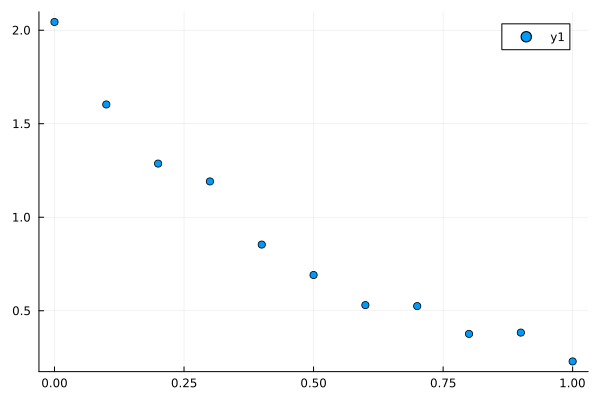

In [38]:
scatter(x,y_exp)

In [106]:
p = hcat(x,y_exp)

11×2 Matrix{Float64}:
 0.0  2.04393
 0.1  1.60294
 0.2  1.2869
 0.3  1.19139
 0.4  0.853816
 0.5  0.691159
 0.6  0.530179
 0.7  0.524896
 0.8  0.376168
 0.9  0.383195
 1.0  0.229027

In [107]:
size(p)

(11, 2)

In [51]:
function lossfunction(u, p)
    return u[1] .* exp.( -u[2] .* p[:,1]) .- p[:,2]
end

lossfunction (generic function with 1 method)

In [52]:
u0 = [1.5,2.0]

2-element Vector{Float64}:
 1.5
 2.0

In [108]:
prob = NonlinearLeastSquaresProblem(lossfunction, u0, p)

NonlinearLeastSquaresProblem with uType Vector{Float64}. In-place: false
u0: 2-element Vector{Float64}:
 1.5
 2.0

In [109]:
sol = solve(prob, GaussNewton(); maxiters = 1000, show_trace = Val(true),
    trace_level = TraceWithJacobianConditionNumber(25))


Algorithm: GaussNewton(
    descent = NewtonDescent(),
    autodiff = AutoForwardDiff(),
    vjp_autodiff = AutoFiniteDiff(
        fdtype = Val{:forward}(),
        fdjtype = Val{:forward}(),
        fdhtype = Val{:hcentral}()
    ),
    jvp_autodiff = AutoForwardDiff(),
    concrete_jac = Val{false}()
)

----    	-------------       	-----------         	-------             
Iter    	f(u) 2-norm         	Step 2-norm         	cond(J)             
----    	-------------       	-----------         	-------             
0       	8.70275881e-01      	0.00000000e+00      	3.37028480e+00      
1       	1.68728225e-01      	5.21311077e-01      	3.37028480e+00      
26      	1.67745147e-01      	1.21699788e-16      	3.37028480e+00      
Final   	1.67745147e-01      
----------------------      


retcode: Stalled
u: 2-element Vector{Float64}:
 2.0156213328842347
 2.0607903989559704

In [110]:
sol.u

2-element Vector{Float64}:
 2.0156213328842347
 2.0607903989559704

In [128]:
chi2(x) = sum(lossfunction(x,p) .^2)/2/0.05^2

chi2 (generic function with 1 method)

In [114]:
chi2(sol.u)

0.014069217214505082

In [115]:
ForwardDiff.gradient(chi2,sol.u)

2-element Vector{Float64}:
 -1.6176296413483726e-16
  2.1031307771701702e-11

In [129]:
h = ForwardDiff.hessian(chi2,sol.u)

2×2 Matrix{Float64}:
 1171.48   -434.727
 -434.727   372.412

In [130]:
inv(h)

2×2 Matrix{Float64}:
 0.00150599  0.00175798
 0.00175798  0.00473734

In [91]:
model(t, p) = p[1] * exp.(-p[2] * t)

model (generic function with 1 method)

In [94]:
fit = curve_fit(model, x, y_exp, u0)

LsqFit.LsqFitResult{Vector{Float64}, Vector{Float64}, Matrix{Float64}, Vector{Float64}, Vector{LsqFit.LMState{LsqFit.LevenbergMarquardt}}}([2.0156213318213543, 2.060790396094327], [-0.028305467375535187, 0.03731411197719359, 0.047881401230159826, -0.10518800441139442, 0.030104252282012522, 0.02814759206272932, 0.055170145389063174, -0.04855761856295271, 0.0114613734549735, -0.0677545543744501, 0.027668831021600754], [1.0000000000036495 0.0; 0.8137687537775544 -0.16402496592961882; … ; 0.15649810831937971 -0.28389683297575447; 0.12735327057771276 -0.2566959688581032], true, Iter     Function value   Gradient norm 
------   --------------   --------------
, Float64[])

In [95]:
cov = estimate_covar(fit)

2×2 Matrix{Float64}:
 0.00187593  0.00217843
 0.00217843  0.00587034